# Heart Disease classification

In [1]:
#importing all the tools required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#display plots inside nb
%matplotlib inline

#importing models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#mdoel evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve


ModuleNotFoundError: No module named 'sklearn'

# Load data
Age : Age of the patient

Sex : Sex of the patient 0 = female 1 = male

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)
 
chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [2]:
df = pd.read_csv("heart.csv")
df.shape

(303, 14)

# data analysis

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

<AxesSubplot:>

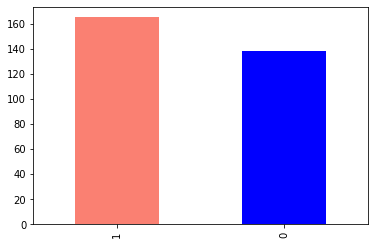

In [5]:
df['output'].value_counts().plot(kind='bar',color=['salmon','blue'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart disease count according to sex

In [9]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

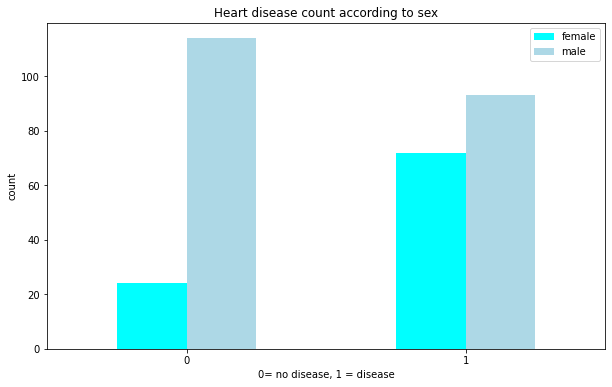

In [12]:
#comparing both of them
pd.crosstab(df['output'],df['sex']).plot(kind='bar',figsize=(10,6),color=['cyan','lightblue'])
plt.title("Heart disease count according to sex")
plt.xlabel("0= no disease, 1 = disease")
plt.ylabel('count')
plt.legend(['female','male'])
plt.xticks(rotation=0);

In [13]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df['thalachh'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalachh, Length: 91, dtype: int64

# compare thalachh age and output

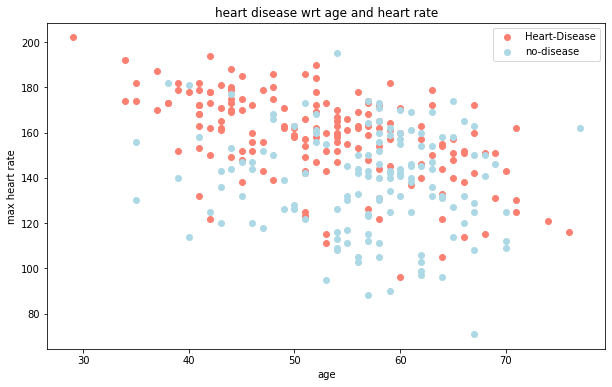

In [15]:
plt.figure(figsize=(10,6))

#plotting only values which has output as 1
plt.scatter( df.age[df.output == 1],
          df.thalachh[df.output == 1],
           c='salmon')

#plotting only values which has output as 0
plt.scatter(df.age[df.output == 0],
           df.thalachh[df.output == 0],
           c='lightblue')

plt.title("heart disease wrt age and heart rate")
plt.ylabel("max heart rate")
plt.xlabel("age")
plt.legend(['Heart-Disease','no-disease']);

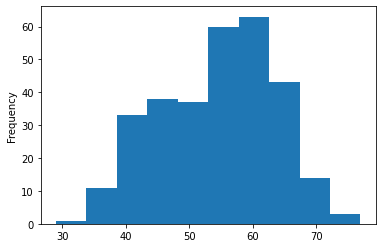

In [16]:
#checking distribution 
df.age.plot.hist();

<AxesSubplot:ylabel='Frequency'>

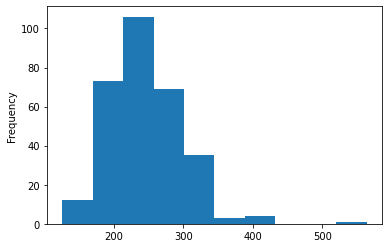

In [17]:
df.chol.plot.hist()

<AxesSubplot:ylabel='Frequency'>

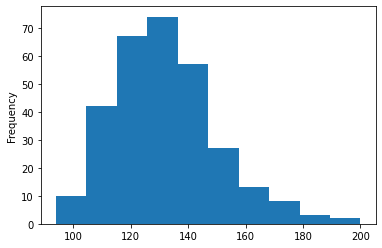

In [18]:
df.trtbps.plot.hist()

# heart disease frequency wrt chest pain
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

In [19]:
pd.crosstab(df.cp, df.output)

output,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


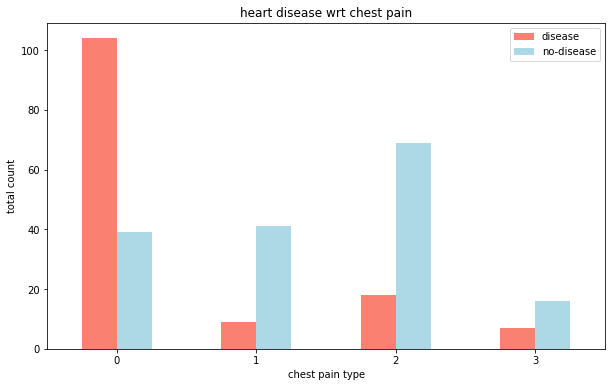

In [20]:
pd.crosstab(df.cp, df.output).plot(kind="bar",figsize=(10,6),color=['salmon','lightblue'])
plt.title('heart disease wrt chest pain')
plt.ylabel('total count')
plt.xlabel('chest pain type')
plt.xticks(rotation=0)
plt.legend(['disease','no-disease']);

In [21]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
#making correlation matrix
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


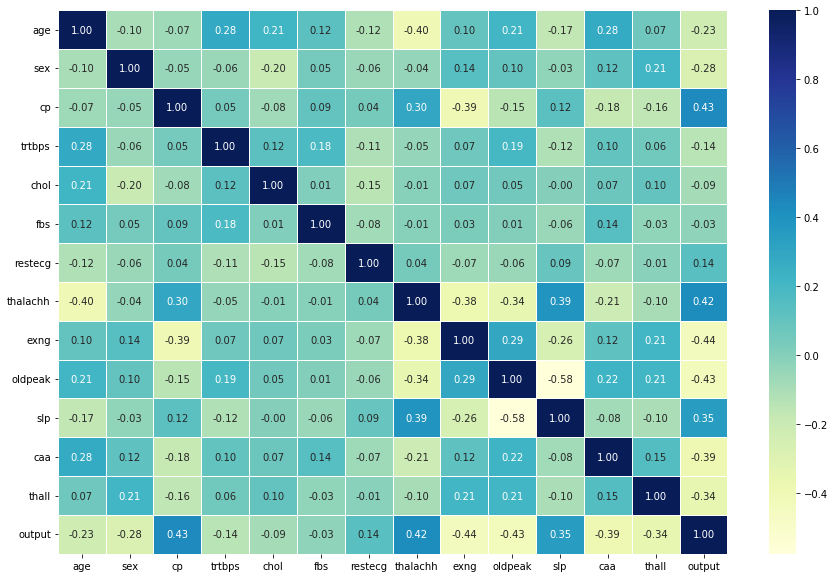

In [23]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap='YlGnBu');

# preparing data

In [24]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
#splitting data into X and y
X = df.drop("output", axis = 1)
y = df['output']

In [26]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [27]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [28]:
#splitting data into train and test set
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

NameError: name 'train_test_split' is not defined

In [ ]:
X_train

In [ ]:
y_train

# testing different models

In [ ]:
#putting different models in dict
models = {"KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Logistic Regression": LogisticRegression()
         }


# fitting and scoring function
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    this function fits and evals ml models
    models: dict of sklearn ml models
    X_train: training values(independent values) 
    X_test: testing values(independent values)
    y_train: training label values 
    y_test: testing label values
    """
    
    #setting random seed
    np.random.seed(42)
    #dict to store model values
    model_scores = {}
    #looping through models in dict
    for name, model in models.items():
        #fitting our model to data
        model.fit(X_train, y_train)
        #storing evaluation score in model_scores
        model_scores[name] = model.score(X_test,y_test) #storing name of the model as key and score as value
    return model_scores

In [ ]:
model_scores = fit_and_score(models = models, 
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)

model_scores

# model accuracy plot

In [ ]:
model_plot = pd.DataFrame(model_scores, index=["accuracy"])#converting dict to df
model_plot.T.plot.bar();

# Improving
    *hyperparameter tuning 
    *feature importance
    *confusion matrix
    *cross validation
    *precision
    *recall
    *f1 score
    *classification report 
    *roc curve
    *area under the curve(auc)

# hyperparameter tuning(manual)


In [ ]:
#tuning knn

#empty lists
test_scores = []
train_scores = []

#creating list for different values for n_neighbors
neighbors = range(1, 21)

#setting up knn instance
knn = KNeighborsClassifier()

#loop through all n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)

    #fit algorithm
    knn.fit(X_train, y_train)
    
    #update train scores
    train_scores.append(knn.score(X_train, y_train))
    
    #update test scores
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores

In [ ]:
test_scores

In [ ]:
plt.plot(neighbors,train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"maximum KNN score on test data: {max(test_scores)*100:.2f}%")

# hyperparameter tuning usimg RandomizedSearchCV

    tuning:
    LogisticRegression()
    RandomForestClassifier()

In [ ]:
#creating hyperparameter grid for LogisticRegression
#20 intervals between -4 and 4
log_reg_grid = {"C": np.logspace(-4, 4 ,20), 
                "solver": ["liblinear"]}

#creating hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5 ,10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
#tune LogisticRegression

np.random.seed(42)

#setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

#fit random hyperparameter searach model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

In [ ]:
#finding best hyperparams for LogisticRegression
rs_log_reg.best_params_

In [ ]:
rs_log_reg.score(X_test, y_test)

In [ ]:
#tune RandomForestClassifier
np.random.seed(42)

#setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

#fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

In [ ]:
#finding best hyperparams for RandomForestClassifier
rs_rf.best_params_

In [ ]:
#evaluate randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test) 

# hyperparameter tuning using GridSearchCV

In [ ]:
#different hypermeters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver" : ["liblinear"]}

#setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#fit grid hyperparameter search LogisticRegression model
gs_log_reg.fit(X_train, y_train)

In [ ]:
#finding best hyperparameters
gs_log_reg.best_params_

In [ ]:
#evaluate grid search LogisticRegression model
gs_log_reg.score(X_test,y_test)

## evaluating or ml classification model 
    using:
    * Aoc and ROC curve
    * Confusion matrix
    * Classification Report
    * precision
    * recall
    * f1-score
  

In [ ]:
#make prediction using our tuned model
y_preds = gs_log_reg.predict(X_test)

In [ ]:
y_preds

In [ ]:
#plot roc curve and calculate auc
plot_roc_curve(gs_log_reg,X_test,y_test)

In [ ]:
#confusion matrix
print(confusion_matrix(y_test,y_preds))

In [ ]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    plots confusion matrix using seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

# calculating evaluation metrics using cross val

In [ ]:
#check for best params
gs_log_reg.best_params_

In [ ]:
#create new classifier with best params
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")


In [ ]:
#cross-validated accuracy 
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")

cv_acc

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

In [ ]:
#cross-validated precision 
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")

cv_precision = np.mean(cv_precision)
cv_precision

In [ ]:
#cross-validated recall 
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

In [ ]:
#cross-validated f1-score 
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

In [ ]:
#visualizing cv-metrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                           "Precison" : cv_precision,
                           "Recall" : cv_recall,
                           "F1" : cv_f1},
                           index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

# feature importance

In [ ]:
#fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [ ]:
#checking coef_
clf.coef_

In [ ]:
#matching coef to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

In [ ]:
#visualizing feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend='false');


In [ ]:
pd.crosstab(df["sex"],df.output)

In [ ]:
pd.crosstab(df["slp"],df.output)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open('model.pkl', 'wb'))

In [ ]:
model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
test_preds = model.predict(X_test)

In [ ]:
test_preds

In [ ]:
test = [63,1,3,145,233,1,0,150,0,2.3,0,0,1]
test = np.array(test)

In [ ]:

test = test.reshape(1,-1)
test.shape

In [ ]:
model.predict(test)